<a href="https://colab.research.google.com/github/OdysseusPolymetis/philo_num_grenoble_24/blob/main/ancient_greek_bert_for_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 17.8

In [ ]:
!git clone https://github.com/PerseusDL/treebank_data.git

Cloning into 'treebank_data'...
remote: Enumerating objects: 2635, done.
remote: Counting objects: 100% (224/224), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 2635 (delta 144), reused 216 (delta 142), pack-reused 2411
Receiving objects: 100% (2635/2635), 75.59 MiB | 19.34 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.
Updating files: 100% (275/275), done.


In [ ]:
greek_dir = '/content/treebank_data/v2.1/Greek/texts'
latin_dir = '/content/treebank_data/v2.1/Latin/texts'

In [ ]:
!git clone https://github.com/pranaydeeps/Ancient-Greek-BERT.git
%cd Ancient-Greek-BERT
!git lfs pull --include "final-model.pt"

Cloning into 'Ancient-Greek-BERT'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 50 (delta 14), reused 18 (delta 1), pack-reused 0
Receiving objects: 100% (50/50), 1.57 MiB | 6.70 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/Ancient-Greek-BERT


In [ ]:
!mkdir ../LM/
!git clone https://huggingface.co/pranaydeeps/Ancient-Greek-BERT ../LM/SuperPeitho-v1

Cloning into '../LM/SuperPeitho-v1'...
remote: Enumerating objects: 41, done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 41
Unpacking objects: 100% (41/41), 427.24 KiB | 5.62 MiB/s, done.
Filtering content: 100% (2/2), 861.62 MiB | 56.04 MiB/s, done.


In [ ]:
from flair.models import SequenceTagger
tagger = SequenceTagger.load("SuperPeitho-FLAIR-v2/final-model.pt")

2024-01-16 15:28:46,768 SequenceTagger predicts: Dictionary with 1030 tags: <unk>, O, a-p---na-, v2spma---, u--------, d--------, v-papamn-, r--------, l-s---ma-, n-s---ma-, v3siie---, l-s---nn-, l-s---fg-, n-s---fg-, l-s---mg-, n-s---mg-, v3ppia---, i--------, n-s---mn-, v3saia---, p-p---fd-, v-sppamn-, a-s---mn-, n-p---mg-, c--------, v3saoa---, p-s---mn-, l-s---mn-, v3siia---, v-sapamg-, b--------, p-s---cg-, p-s---fd-, l-p---mg-, a-p---mg-, a-s---ma-, v-sppamg-, v3spia---, a-p---ng-, n-p---ng-, _, v3piie---, l-p---md-, a-p---md-, v-pppamn-, p-p---ma-, l-s---fa-, n-s---fa-, n-p---na-, v3paia---


In [ ]:
import os
import xml.etree.ElementTree as ET
import csv

In [ ]:
def parse_treebank_file(file_path):

    tree = ET.parse(file_path)
    root = tree.getroot()

    indexed_gold_sentences = []
    file_id1 = os.path.basename(file_path)
    print(file_id1)
    print(len(root.findall('.//sentence')))

    for i, sentence in enumerate(root.findall('.//sentence')):
        words = []
        for word in sentence.findall('.//word'):
            words.append({
                'form': word.get('form'),
                'lemma': word.get('lemma'),
                'postag': word.get('postag'),
                'relation': word.get('relation'),
                'head': word.get('head')
            })
        indexed_gold_sentences.append((file_id1,i, words))
    return indexed_gold_sentences

In [ ]:
def process_gold_directory(directory, filter_text):
    all_sentences = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if filter_text in file:
                file_path = os.path.join(root, file)
                sentences = parse_treebank_file(file_path)

                for sentence in sentences:
                    all_sentences.append(sentence)

                print(f"Processed {file_path}")

    return all_sentences

In [ ]:
treebank_sentences=process_gold_directory(greek_dir, 'tlg0012')

tlg0012.tlg002.perseus-grc1.tb.xml
6723
Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg002.perseus-grc1.tb.xml
tlg0012.tlg001.perseus-grc1.tb.xml
8415
Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg001.perseus-grc1.tb.xml


In [ ]:
def parse_treebank_file(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    file_id2 = os.path.basename(file_path)

    sentences = []
    for i, sentence in enumerate(root.findall('.//sentence')):
        words = [word.get('form') for word in sentence.findall('.//word')]
        sentence_text = ' '.join(words)
        sentences.append((file_id2, i, sentence_text))
    return sentences

In [ ]:
from flair.data import Sentence

sentence = Sentence("ἄνδρα μοι ἔννεπε, μοῦσα, πολύτροπον")
tagger.predict(sentence)
print(sentence)

Sentence[7]: "ἄνδρα μοι ἔννεπε, μοῦσα, πολύτροπον" → ["ἄνδρα"/n-s---ma-, "μοι"/p1s---cd-, "ἔννεπε"/v2spma---, ","/u--------, "μοῦσα"/n-s---fv-, ","/u--------, "πολύτροπον"/a-s---ma-]


In [ ]:
def analyze_with_flair(sentences, tagger):
    analyzed_sentences = []
    for file_id2, index, sentence_text in sentences:
        sentence = Sentence(sentence_text)
        tagger.predict(sentence)
        sentence_dict = sentence.to_dict(tag_type='pos')
        #print("Sortie de sentence.to_dict:", sentence_dict)  # Ajout d'un print pour le diagnostic
        analyzed_sentences.append((file_id2, index, sentence_dict))
    return analyzed_sentences

In [ ]:
def process_directory(directory, filter_text, language, nb_of_sentences, tagger):
    all_sentences = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if filter_text in file:
                file_path = os.path.join(root, file)
                sentences = parse_treebank_file(file_path)
                all_sentences.extend(sentences)
                print(f"Processed {file_path}")
    analyzed_sentences = analyze_with_flair(all_sentences[:nb_of_sentences], tagger)
    return analyzed_sentences

In [ ]:
nb_of_sentences = 100
bert_sentences = process_directory(greek_dir, 'tlg0012', 'grc', nb_of_sentences, tagger)

Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg002.perseus-grc1.tb.xml
Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg001.perseus-grc1.tb.xml


In [ ]:
def compare_results(treebank_sentences, bert_sentences):
    for (file_id_tb, index_tb, sentence_tb), (file_id_bert, index_bert, sentence_bert) in zip(treebank_sentences, bert_sentences):
        print(file_id_tb)
        if file_id_tb == file_id_bert and index_tb == index_bert:
            if file_id_tb==file_id_bert and index_tb==index_bert :
              print("treebank : "+str(sentence_tb))
              print("bert data : "+str(sentence_bert))
            pass

In [ ]:
compare_results(treebank_sentences, bert_sentences)

tlg0012.tlg002.perseus-grc1.tb.xml
treebank : [{'form': 'ἄνδρα', 'lemma': 'ἀνήρ', 'postag': 'n-s---ma-', 'relation': 'OBJ', 'head': '3'}, {'form': 'μοι', 'lemma': 'ἐγώ', 'postag': 'p-s---md-', 'relation': 'OBJ', 'head': '3'}, {'form': 'ἔννεπε', 'lemma': 'ἐνέπω', 'postag': 'v2spma---', 'relation': 'PRED', 'head': '0'}, {'form': ',', 'lemma': ',', 'postag': 'u--------', 'relation': 'AuxX', 'head': '5'}, {'form': 'μοῦσα', 'lemma': 'Μοῦσα', 'postag': 'n-s---fv-', 'relation': 'ExD', 'head': '3'}, {'form': ',', 'lemma': ',', 'postag': 'u--------', 'relation': 'AuxX', 'head': '5'}, {'form': 'πολύτροπον', 'lemma': 'πολύτροπος', 'postag': 'a-s---ma-', 'relation': 'ATR', 'head': '1'}, {'form': ',', 'lemma': ',', 'postag': 'u--------', 'relation': 'AuxX', 'head': '12'}, {'form': 'ὃς', 'lemma': 'ὅς', 'postag': 'p-s---mn-', 'relation': 'SBJ', 'head': '12'}, {'form': 'μάλα', 'lemma': 'μάλα', 'postag': 'd--------', 'relation': 'AuxZ', 'head': '11'}, {'form': 'πολλὰ', 'lemma': 'πολύς', 'postag': 'd---

n	noun
<br>v	verb
<br>t	participle
<br>a	adjective
<br>d	adverb
<br>l	article
<br>g	particle
<br>c	conjunction
<br>r	preposition
<br>p	pronoun
<br>m	numeral
<br>i	interjection
<br>e	exclamation
<br>u	punctuation

In [ ]:
def compare_annotations(tb_sentence, bert_data):
    error_details = {
        'lemma_errors': [],
        'pos_errors': [],
        'word_pos_comparisons': []  # Ajout pour comparer les mots avec les postags
    }

    bert_tokens = {token['text']: token for token in bert_data['tokens']}

    for tb_word in tb_sentence[2]:
        tb_text = tb_word['form']
        tb_pos = tb_word['postag']

        bert_token = bert_tokens.get(tb_text)

        # Ajout d'un enregistrement pour comparer les mots avec les postags
        if bert_token:
            bert_text = bert_token['text']
            bert_pos = bert_token['labels'][0]['value'] if bert_token['labels'] else None
            error_details['word_pos_comparisons'].append({
                'treebank_word': tb_text,
                'treebank_pos': tb_pos,
                'bert_word': bert_text,
                'bert_pos': bert_pos
                })

            if tb_pos != bert_pos:
              error_details['pos_errors'].append({
                'word': tb_text,
                'tb_pos': tb_pos,
                'bert_pos': bert_pos
            })


    return error_details

In [ ]:
all_errors = {
    'lemma_errors': [],
    'pos_errors': []
}

for tb_sentence, bert_tuple in zip(treebank_sentences, bert_sentences):
    file_id_bert, index_bert, bert_data = bert_tuple
    if file_id_bert == tb_sentence[0] and index_bert == tb_sentence[1]:
        try:
            errors = compare_annotations(tb_sentence, bert_data)
            all_errors['lemma_errors'].extend(errors['lemma_errors'])
            all_errors['pos_errors'].extend(errors['pos_errors'])

            # Afficher les comparaisons uniquement si les POS sont différents et ne sont pas 'g', 'd', ou 'b'
            for comparison in errors['word_pos_comparisons']:
                if (comparison['treebank_word'] == comparison['bert_word'] and
                    comparison['treebank_pos'][0] != comparison['bert_pos'][0] and
                    comparison['treebank_pos'][0] not in ['g', 'd', 'b'] and
                    comparison['bert_pos'][0] not in ['g', 'd', 'b']):
                    full_sentence = " ".join([word['form'] for word in tb_sentence[2]])
                    print(f"Phrase complète: {full_sentence}")
                    print(f"Treebank Word: {comparison['treebank_word']} (POS: {comparison['treebank_pos']}) - "
                          f"BERT Word: {comparison['bert_word']} (POS: {comparison['bert_pos']})")

        except ValueError as e:
            print(f"Erreur dans les données : {e}")


print("Lemma Errors:", all_errors['lemma_errors'])
print("POS Errors:", all_errors['pos_errors'])

Phrase complète: πολλῶν δ̓ ἀνθρώπων ἴδεν ἄστεα καὶ νόον ἔγνω , πολλὰ δ̓ ὅ γ̓ ἐν πόντῳ πάθεν ἄλγεα ὃν κατὰ θυμόν , ἀρνύμενος ἥν τε ψυχὴν καὶ νόστον ἑταίρων .
Treebank Word: ὃν (POS: p-s---ma-) - BERT Word: ὃν (POS: v-sppana-)
Phrase complète: αὐτῶν γὰρ σφετέρῃσιν ἀτασθαλίῃσιν ὄλοντο , νήπιοι , οἳ κατὰ βοῦς Ὑπερίονος Ἠελίοιο ἤσθιον ·
Treebank Word: αὐτῶν (POS: a-p---mg-) - BERT Word: αὐτῶν (POS: p-p---mg-)
Phrase complète: αὐτῶν γὰρ σφετέρῃσιν ἀτασθαλίῃσιν ὄλοντο , νήπιοι , οἳ κατὰ βοῦς Ὑπερίονος Ἠελίοιο ἤσθιον ·
Treebank Word: Ὑπερίονος (POS: n-s---mg-) - BERT Word: Ὑπερίονος (POS: a-s---mg-)
Phrase complète: ἔνθ̓ ἄλλοι μὲν πάντες , ὅσοι φύγον αἰπὺν ὄλεθρον , οἴκοι ἔσαν , πόλεμόν τε πεφευγότες ἠδὲ θάλασσαν ·
Treebank Word: ἄλλοι (POS: a-p---mn-) - BERT Word: ἄλλοι (POS: p-p---mn-)
Phrase complète: ἔνθ̓ ἄλλοι μὲν πάντες , ὅσοι φύγον αἰπὺν ὄλεθρον , οἴκοι ἔσαν , πόλεμόν τε πεφευγότες ἠδὲ θάλασσαν ·
Treebank Word: ὅσοι (POS: a-p---mn-) - BERT Word: ὅσοι (POS: p-p---mn-)
Phrase complète: τὸ

In [ ]:
from collections import Counter

# Filtrer les erreurs POS en excluant 'g', 'd', et 'b'
filtered_pos_errors = [error for error in all_errors['pos_errors']
                       if error['tb_pos'] is not None and
                          error['tb_pos'][0] not in ['g', 'd', 'b']]

# Compter les erreurs en ne tenant compte que des erreurs filtrées
pos_error_counts = Counter([error['tb_pos'][0] for error in filtered_pos_errors])

print(pos_error_counts)


Counter({'v': 69, 'a': 69, 'p': 60, 'n': 45, 'c': 34, 'l': 31, '-': 3})


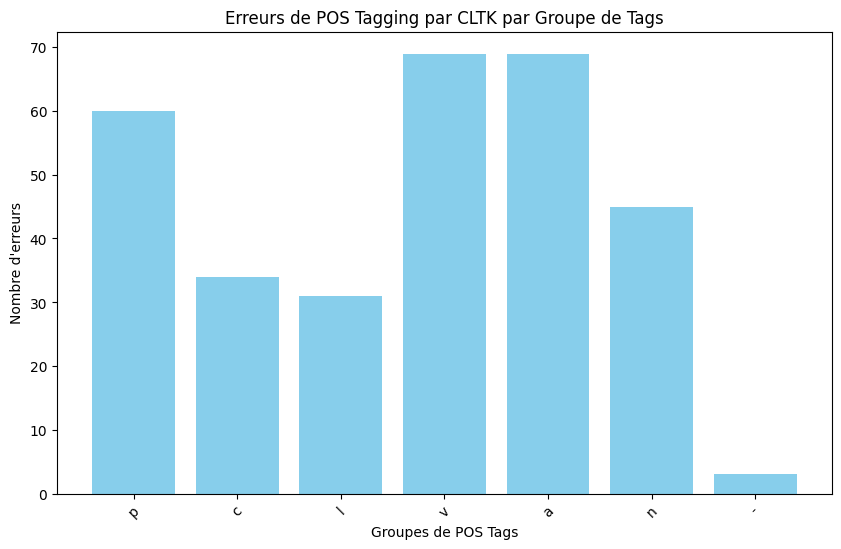

In [ ]:
import matplotlib.pyplot as plt

pos_groups = list(pos_error_counts.keys())
errors = list(pos_error_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(pos_groups, errors, color='skyblue')
plt.xlabel('Groupes de POS Tags')
plt.ylabel('Nombre d\'erreurs')
plt.title('Erreurs de POS Tagging par CLTK par Groupe de Tags')
plt.xticks(rotation=45)
plt.show()

In [ ]:
output_file = '/content/flair_results.csv'

# Écriture dans le fichier CSV
with open(output_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # En-têtes
    writer.writerow(['Word', 'TB Lemma', 'Bert Lemma', 'TB POS', 'Bert POS'])

    for error in all_errors['lemma_errors']:
        writer.writerow([error['word'], error['tb_lemma'], error['bert_lemma'], '', ''])

    for error in all_errors['pos_errors']:
        writer.writerow([error['word'], '', '', error['tb_pos'], error['bert_pos']])